###  *To perform and implement Gradient Desent on Neural Network*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("WineQT.csv")

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#scale 0 to 1


In [7]:
df_train=data.sample(frac=0.7,random_state=0)
df_valid=data.drop(df_train.index)
df_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
946,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5,1333
142,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4,199
934,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6,1319
625,9.0,0.800,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,6,886
124,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5,176


In [8]:
#scale to {0,1}
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

In [9]:
#split features and target
x_train =df_train.drop(['quality','Id'],axis=1)
x_valid =df_valid.drop(['quality','Id'],axis=1)
y_train =df_train['quality']
y_valid =df_valid['quality']

In [10]:
y_train

946     0.4
142     0.2
934     0.6
625     0.6
124     0.4
       ... 
1064    0.6
517     0.4
653     0.4
573     0.4
647     0.4
Name: quality, Length: 800, dtype: float64

In [11]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
946,0.381818,0.448630,0.22,0.069930,0.111853,0.164179,0.148410,0.548554,0.346457,0.074534,0.171875
142,0.181818,0.664384,0.06,0.062937,0.081803,0.164179,0.088339,0.340993,0.606299,0.024845,0.453125
934,0.381818,0.438356,0.68,0.034965,0.671119,0.253731,0.204947,0.468495,0.125984,0.583851,0.093750
625,0.372727,0.465753,0.12,0.083916,0.118531,0.104478,0.077739,0.604893,0.464567,0.161491,0.296875
124,0.218182,0.178082,0.21,0.055944,0.113523,0.089552,0.102473,0.437361,0.464567,0.049689,0.156250
...,...,...,...,...,...,...,...,...,...,...,...
1064,0.200000,0.068493,0.49,0.041958,0.045075,0.104478,0.042403,0.240178,0.511811,0.105590,0.609375
517,0.136364,0.308219,0.02,0.041958,0.091820,0.044776,0.017668,0.504077,0.566929,0.180124,0.156250
653,0.336364,0.239726,0.27,0.076923,0.071786,0.194030,0.077739,0.367680,0.346457,0.254658,0.421875
573,0.345455,0.232877,0.31,0.090909,0.190317,0.343284,0.204947,0.538176,0.283465,0.217391,0.171875


In [12]:
x_train.shape

(800, 11)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model_adam=keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=[11]),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),
])

In [15]:
model_adam.compile(
    optimizer='adam',
    loss='mae',
)

In [16]:
history_adam=model_adam.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10

4/4 [==============================] - 1s 53ms/step - loss: 0.3270 - val_loss: 0.2233
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1589 - val_loss: 0.1570
Epoch 3/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1403 - val_loss: 0.1295
Epoch 4/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1265 - val_loss: 0.1168
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1133 - val_loss: 0.1153
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1082 - val_loss: 0.1169
Epoch 7/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1057 - val_loss: 0.1167
Epoch 8/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1070 - val_loss: 0.1148
Epoch 9/10
4/4 [==============================] - 0s 18ms/step - loss: 0.1066 - val_loss: 0.1084
Epoch 10/10
4/4 [==============================] - 0s 18ms/step - loss: 0.1026 - val_loss: 0.1072


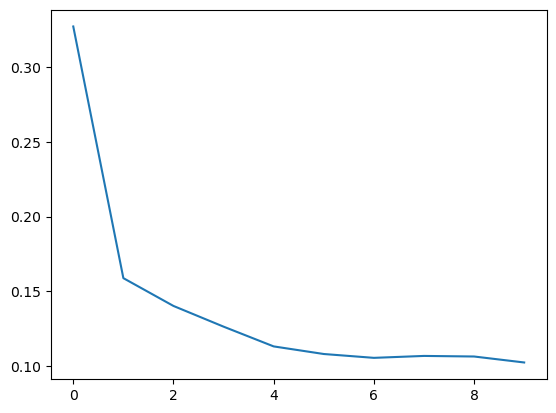

In [17]:
history_adam_df=pd.DataFrame(history_adam.history)
history_adam_df['loss'].plot();

Epoch 1/10
4/4 [==============================] - 1s 61ms/step - loss: 0.3532 - val_loss: 0.1530
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 0.1690 - val_loss: 0.1408
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1516 - val_loss: 0.1385
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 0.1272 - val_loss: 0.1575
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1392 - val_loss: 0.1151
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1068 - val_loss: 0.1385
Epoch 7/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1494 - val_loss: 0.1532
Epoch 8/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1258 - val_loss: 0.1173
Epoch 9/10
4/4 [==============================] - 0s 15ms/step - loss: 0.1188 - val_loss: 0.1291
Epoch 10/10
4/4 [==============================] - 0s 16ms/step - loss: 0.1247 - val_loss: 0.1428


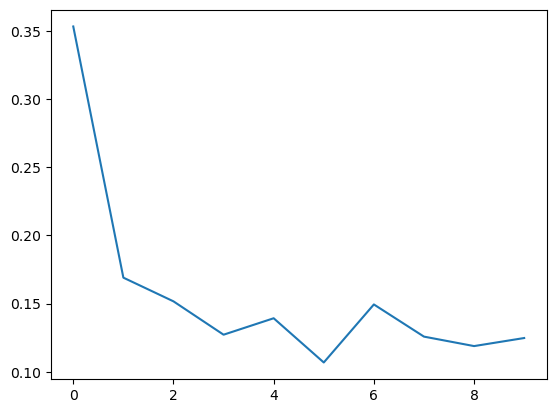

In [18]:
model_rmsprop=keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=[11]),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),
])
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='mae',
)
history_rmsprop=model_rmsprop.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=10,
)
history_rmsprop_df=pd.DataFrame(history_rmsprop.history)
history_rmsprop_df['loss'].plot();

Epoch 1/10
4/4 [==============================] - 0s 52ms/step - loss: 0.5200 - val_loss: 0.4899
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 0.4882 - val_loss: 0.4602
Epoch 3/10
4/4 [==============================] - 0s 15ms/step - loss: 0.4585 - val_loss: 0.4320
Epoch 4/10
4/4 [==============================] - 0s 18ms/step - loss: 0.4302 - val_loss: 0.4043
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.4023 - val_loss: 0.3774
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 0.3751 - val_loss: 0.3509
Epoch 7/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3484 - val_loss: 0.3253
Epoch 8/10
4/4 [==============================] - 0s 15ms/step - loss: 0.3226 - val_loss: 0.3015
Epoch 9/10
4/4 [==============================] - 0s 17ms/step - loss: 0.2984 - val_loss: 0.2777
Epoch 10/10
4/4 [==============================] - 0s 15ms/step - loss: 0.2741 - val_loss: 0.2539


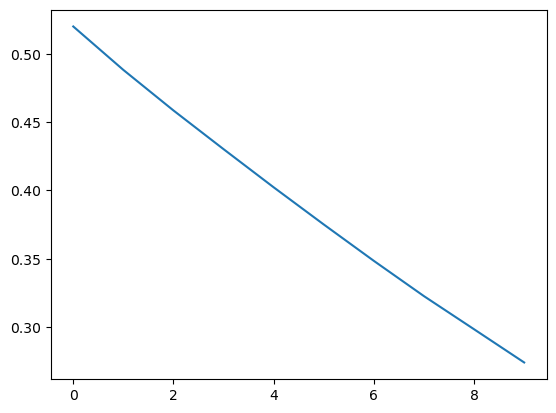

In [19]:
model_adagrad=keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=[11]),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),
])
model_adagrad.compile(
    optimizer='adagrad',
    loss='mae',
)
history_adagrad=model_adagrad.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=10,
)
history_adagrad_df=pd.DataFrame(history_adagrad.history)
history_adagrad_df['loss'].plot();